# 🛠️ Understanding Git Merging: Fast Forward & Three-Way Merges

Merging is the process of integrating changes from one branch into another. In Git, we have two types of merges:

1. **Fast Forward Merges** 
2. **Three-Way Merges** 

Let's explore both with real-world examples! 🧐

---

## 🔹 Fast Forward Merge


### Scenario 📝
Imagine we have a master branch with three commits. We create a new branch called `bugfix`. In Git, a branch is just a pointer to a commit. Initially, both `master` and `bugfix` point to the same commit.

```sh
# Check the current branches
$ git branch
* master

# Create and switch to a new branch
$ git checkout -b bugfix
Switched to a new branch 'bugfix'
```

Now, we make a couple of commits on the `bugfix` branch.

```sh
# Make changes and commit
$ echo "Fixing a bug" > bug.txt
$ git add bug.txt
$ git commit -m "Fixed a bug"

# Make another change
$ echo "Another fix" >> bug.txt
$ git commit -am "Another fix applied"
```

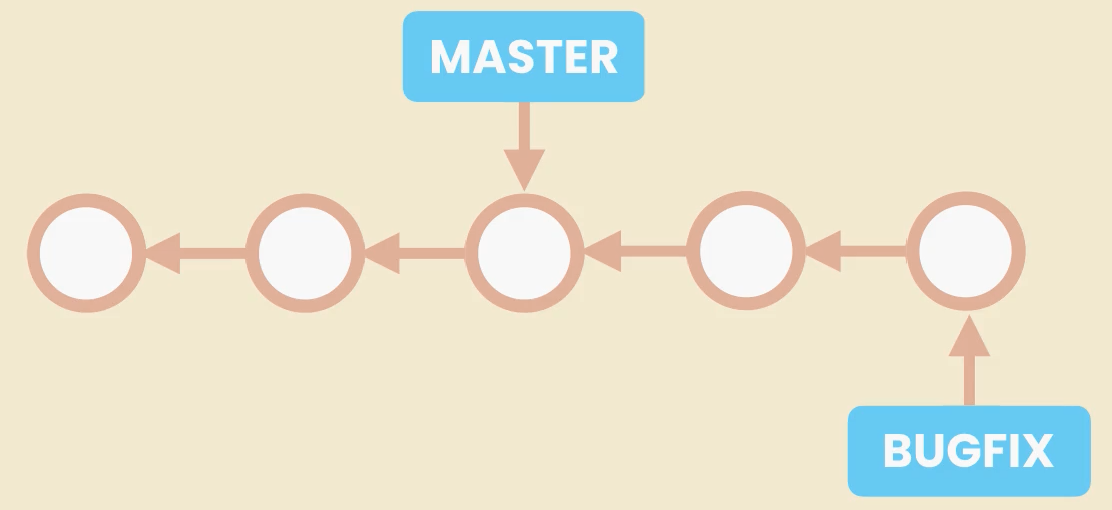

At this point, the `bugfix` branch is ahead of `master`. Since the branches haven't diverged, merging is straightforward.

```sh
# Switch back to master
$ git checkout master

# Merge the bugfix branch
$ git merge bugfix
```

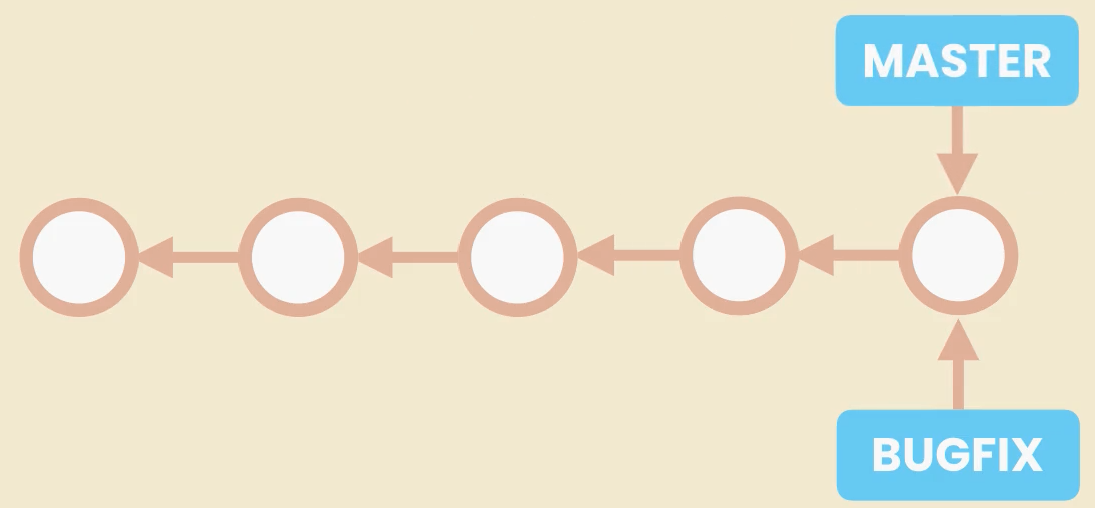


🔹 **What happens?**
Since there’s a direct linear path from `bugfix` to `master`, Git **moves the `master` pointer forward** without creating a new commit. This is a **Fast Forward Merge**.

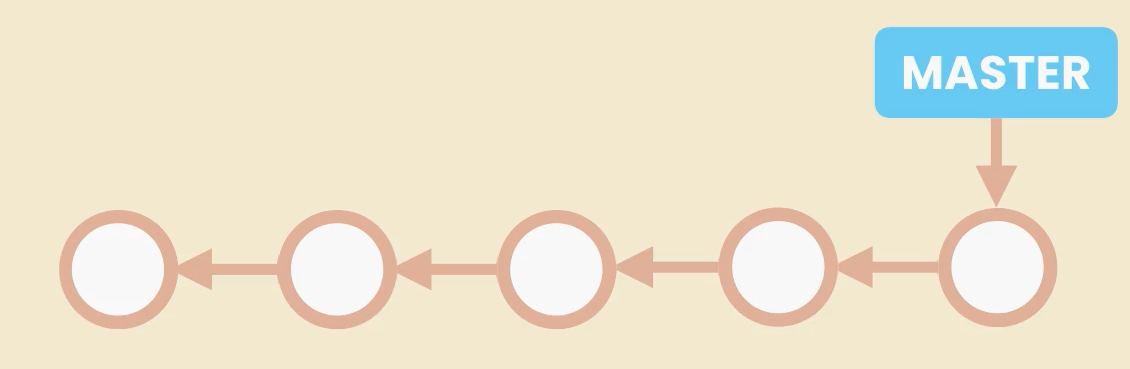

```sh
Updating 3f7a6c2..9b9cbb1
Fast-forward
 bug.txt | 2 ++
 1 file changed, 2 insertions(+)
```

Once merged, we can delete the `bugfix` branch.

```sh
$ git branch -d bugfix
Deleted branch bugfix.
```

✅ **Fast Forward Merge is simple and efficient because no extra commits are created.**

---

## 🔹 Three-Way Merge

### Scenario 📝
Now, let’s explore a case where branches have **diverged**.

```sh
# Create a new branch and switch to it
$ git checkout -b bugfix
```

Make some changes in the `bugfix` branch.

```sh
$ echo "Bug fixed" > bug.txt
$ git add bug.txt
$ git commit -m "Bug fix implemented"
```

Now, **before merging**, we switch to `master` and make another change.

```sh
# Switch to master
$ git checkout master

# Modify another file
$ echo "Feature update" > feature.txt
$ git add feature.txt
$ git commit -m "Feature update added"
```

At this point, `master` and `bugfix` have **different changes**. If we try to merge, Git **cannot fast forward** because `master` has unique commits.

```sh
# Merge the bugfix branch into master
$ git merge bugfix
```

🔹 **What happens?**
Since `master` and `bugfix` have diverged, Git creates a **new commit** that combines changes from both branches. This is a **Three-Way Merge**.

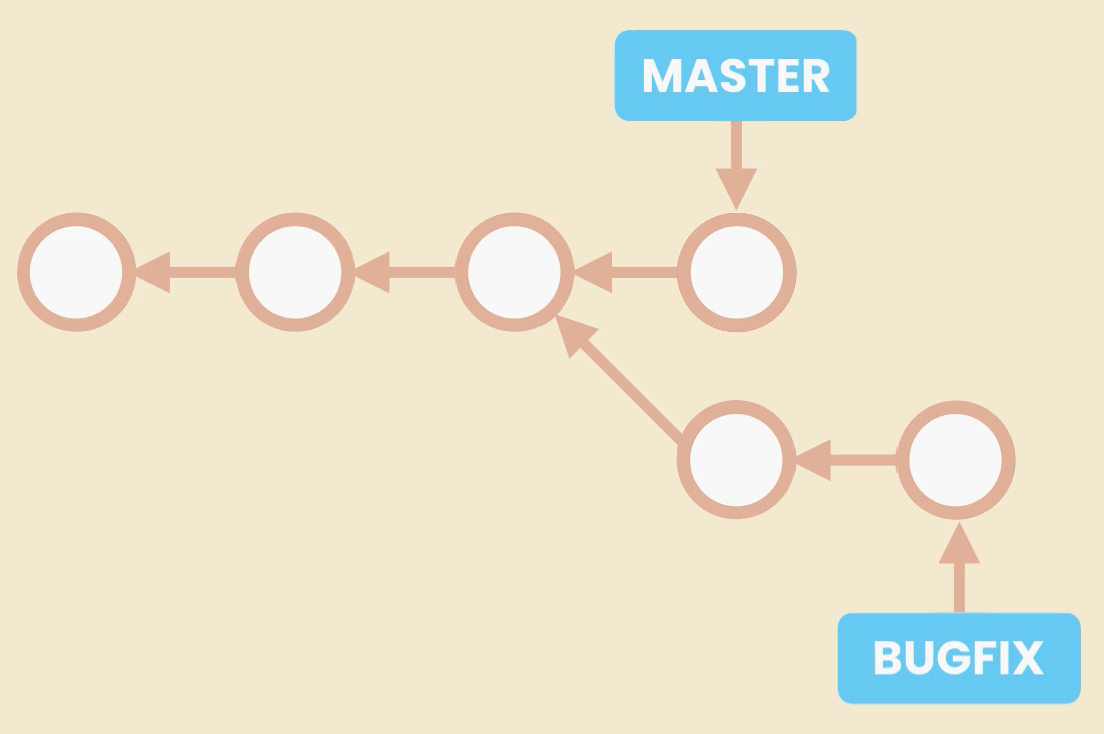

```sh
Merge made by the 'recursive' strategy.
 bug.txt     | 1 +
 feature.txt | 1 +
 2 files changed, 2 insertions(+)
```

Git automatically resolves the changes and generates a **merge commit**.

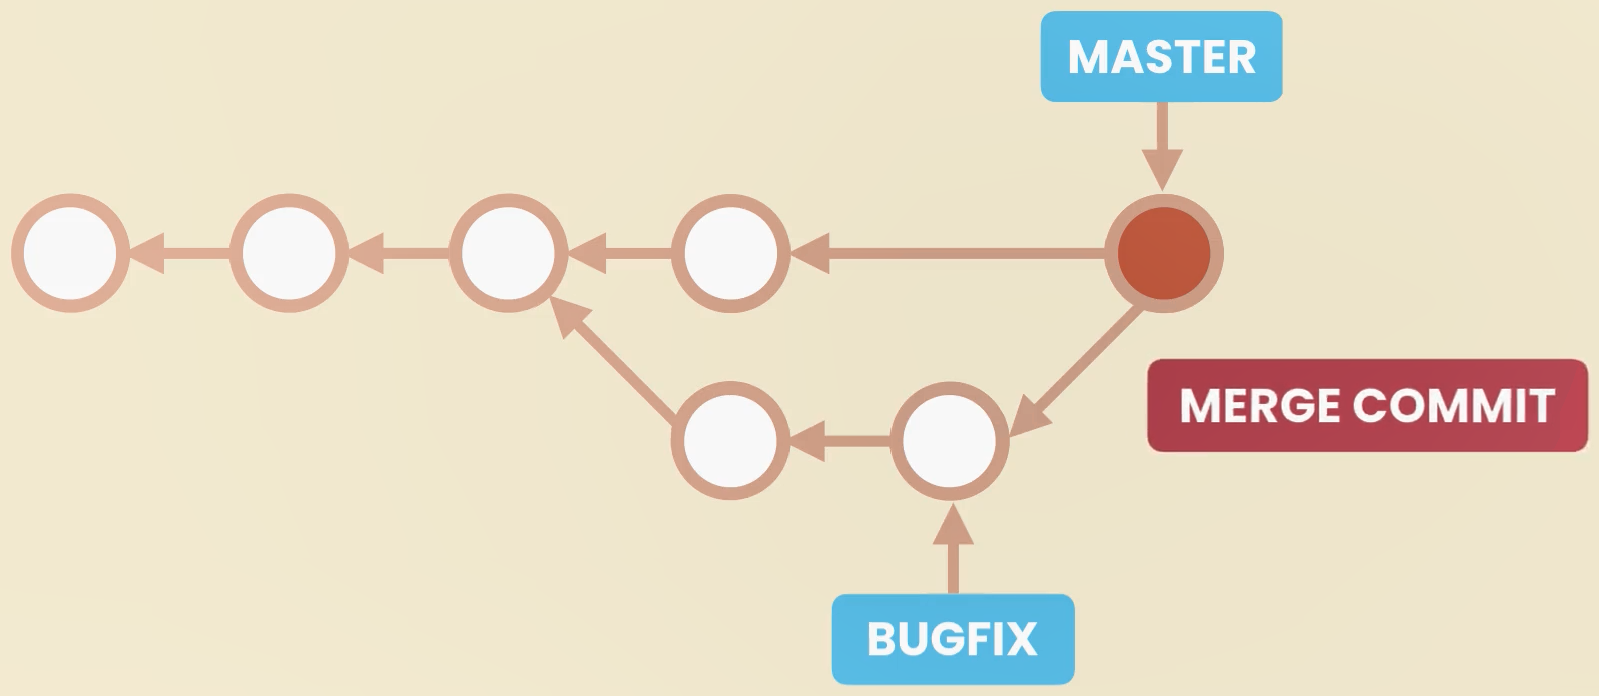

📌 **Why is it called a Three-Way Merge?**
It involves three commits:
1. The common ancestor (original commit before branching)
2. The `master` branch tip
3. The `bugfix` branch tip

Git looks at these three snapshots and decides how to combine them.

✅ **Three-Way Merge ensures that both branches' changes are preserved.**

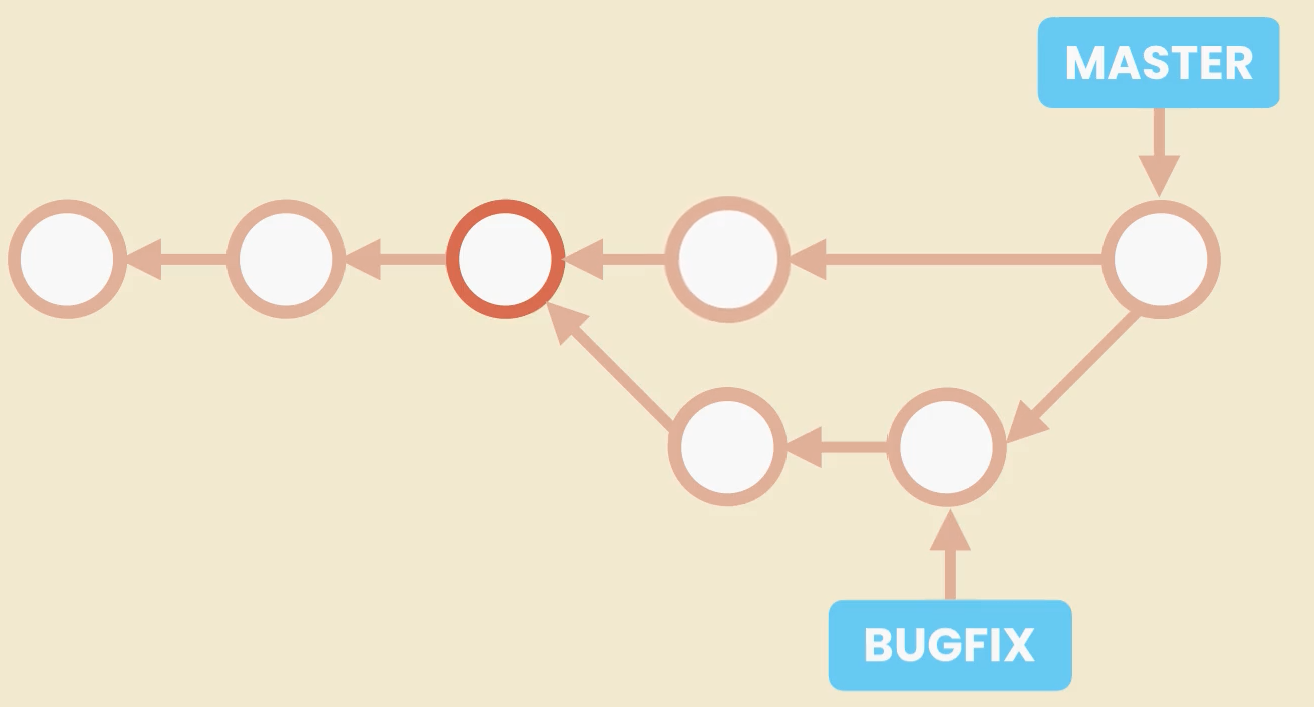
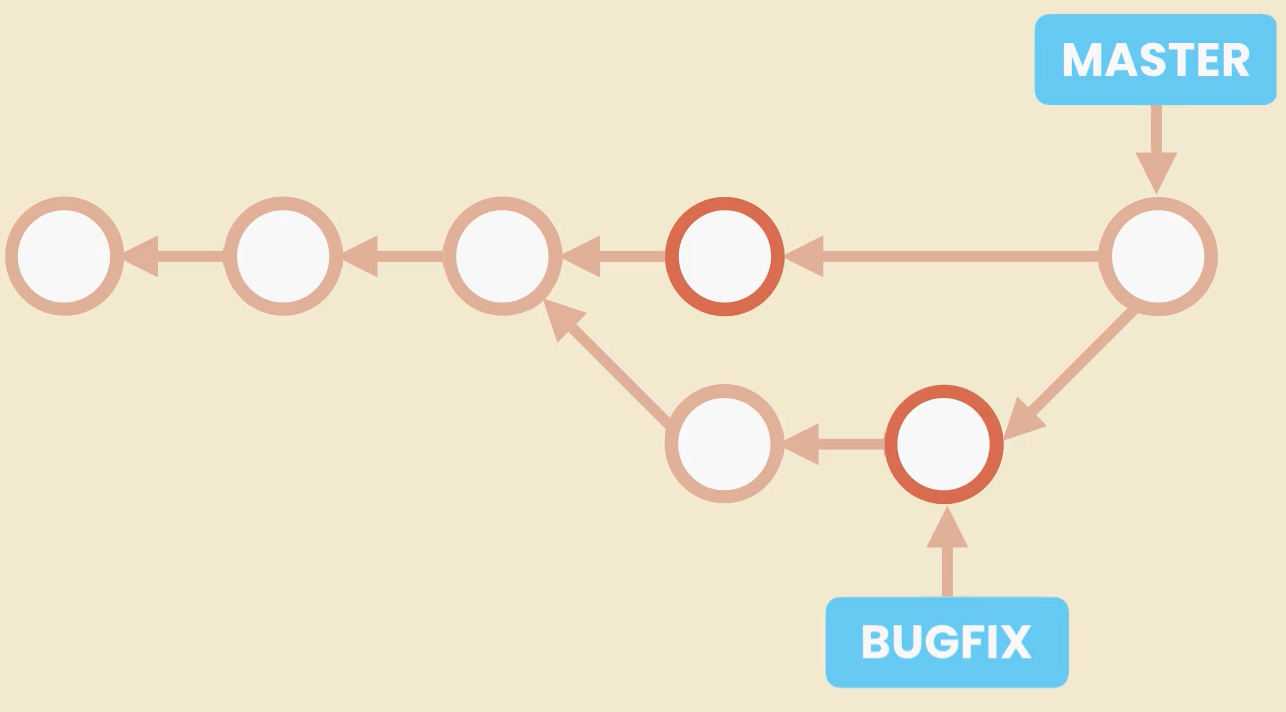

---

## 🔹 Recap 🏆
- **Fast Forward Merge** happens when branches haven't diverged. Git simply moves the pointer forward.
- **Three-Way Merge** happens when branches have diverged. Git creates a new commit to merge changes.

🎯 **Understanding when to use each type of merge is crucial for maintaining a clean Git history!**
